In [17]:
%matplotlib widget
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cks=(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [18]:
data_url = 'https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt'
data_url2 = 'ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt'
archivo_temperaturas = 'data_temperatura_global.txt'
archivo_CO2 = 'data_CO2.txt'
sourceFile = open(archivo_temperaturas, 'w')

try:
   with urllib.request.urlopen(data_url) as f:
      data_txt = f.read().decode('utf-8')
      print(data_txt, file = sourceFile)
except urllib.error.URLError as e:
   print(e.reason)
sourceFile.close()
sourceFile = open(archivo_CO2, 'w')
try:
   with urllib.request.urlopen(data_url2) as f:
      data_txt = f.read().decode('utf-8')
      print(data_txt, file = sourceFile)
except urllib.error.URLError as e:
   print(e.reason)
sourceFile.close()


In [19]:

A = pd.read_csv(archivo_temperaturas,skiprows=3,delim_whitespace=True)
A = A.drop([0])
Años, Temp, Temp_s = A.to_numpy().T
Años =  np.asarray(Años, dtype=np.float64, order='C')
Temp =  np.asarray(Temp, dtype=np.float64, order='C')
B = pd.read_csv(archivo_CO2,skiprows=53,delim_whitespace=True)
Años1,Mes1,Año_C, CO2,CO2_s,aux1,aux2,axu3 = B.to_numpy().T

Temp2 = np.interp(Año_C,Años,Temp)
Temp3 = Temp2 / Temp2 * Temp2[0]+np.random.randn(len(Temp2))*.01

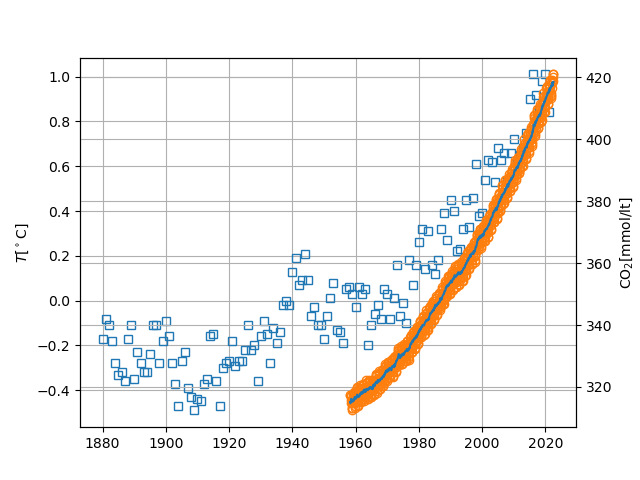

In [27]:
Años_label = np.linspace(Años[0],Años[-1],10)
fig0,ax0 = plt.subplots()
ax1 = ax0.twinx()
ax0.plot(Años,Temp,'s',fillstyle='none')
#ax0.plot(Años,Temp_s)
#ax0.plot(Años,Temp,'s',fillstyle='none')
#ax0.plot(Año_C,Temp2,'.')
#ax0.plot(Año_C,Temp3,'.')
#ax0.plot(Año_C,Temp2[::-1],'.')
ax1.plot(Año_C,CO2,'o',fillstyle='none',color=cks[1])
ax1.plot(Año_C,CO2_s);
ax0.set_ylabel('$T[^\circ$C]')
ax1.set_ylabel('CO$_2$[mmol/lt]')
ax0.grid();ax1.grid();

In [21]:
XC1 = np.correlate((Temp2-Temp2.mean())/Temp2.mean(),((CO2-CO2.mean())/CO2.mean()))
XC2 = np.correlate(Temp3-Temp3.mean(),CO2-CO2.mean())
XC3 = np.correlate(Temp2[::-1]-Temp2.mean(),CO2-CO2.mean())

#XC2 = np.correlate(Temp3-Temp3.mean(),CO2-CO2.mean()+0.001*np.random.randn(len(CO2),1) )

In [22]:
XC1,XC2,XC3

(array([57.02335092]), array([17.03308482]), array([-7031.34019115]))

'#ff7f0e'